In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import sklearn
from sklearn import linear_model
from sklearn.neighbors import NearestCentroid

from sklearn import tree
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split



In [288]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = [train,test]
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Quick insight

In [289]:
train.shape

(1460, 81)

In [290]:
test.shape

(1459, 80)

In [291]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [292]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [293]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [294]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## data exploration

In [295]:
# the correlation between attributes
corrmat = train.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


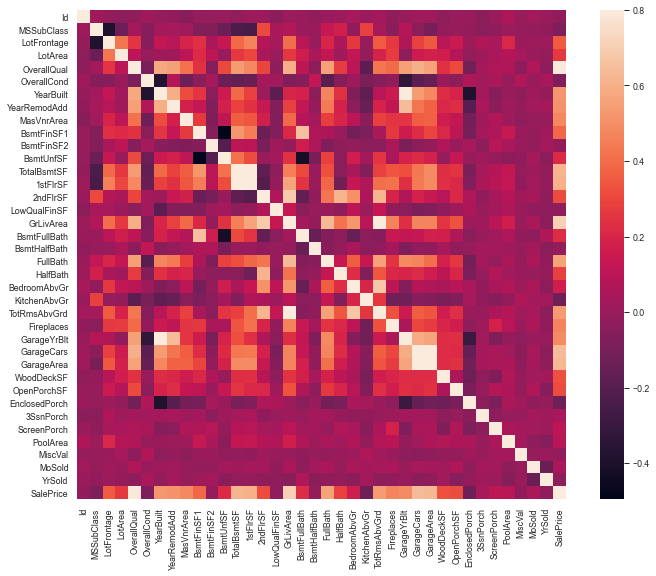

In [296]:
# heatmap representing the correlation
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);

In [297]:
# get the least attributes correlated with `SalePrice` to drop from the data
# columns = corrmat['SalePrice'].sort_values(ascending=False)
# columns = columns[columns < 0.1]
# columns = columns.index
# columns

Index(['PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [298]:
# we don't need to do that, the model will give them the suitable weights 
# drop the uncorrelated attributes
# for dataset in combine:
#     dataset.drop(columns,axis=1,inplace=True)

## Cleaning
### training data

In [299]:
# which attributes need to clean
null = train.isnull().sum()
null[null != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [300]:
#clean LotFrontage 
#assign random values in range (mean - std) and (mean + std)
for dataset in combine:
    mean = dataset['LotFrontage'].mean()
    std = dataset['LotFrontage'].std()
    count = dataset['LotFrontage'].isnull().sum()
    dataset.loc[dataset['LotFrontage'].isnull(),'LotFrontage'] = np.random.randint(mean-std,mean+std,count)

In [301]:
#clean MasVnrArea
for dataset in [train,test]:
    dataset.loc[dataset['MasVnrArea'].isnull(),'MasVnrArea'] = str(dataset['MasVnrArea'].mean())

In [302]:
#clean BsmtQual - BsmtCond - BsmtExposure - BsmtFinType1 - BsmtFinType2
for dataset in [train,test]:
    for feature in [['BsmtQual',30] , ['BsmtCond',31] , ['BsmtExposure',32] , ['BsmtFinType1',33] , ['BsmtFinType2',35] 
                   , ['GarageType',58] , ['GarageYrBlt',59] , ['GarageFinish',60] , ['GarageQual',63] , ['GarageCond',64]
                   , ['MasVnrType',25] , ['MasVnrArea',26] ]:
        column = dataset.columns[feature[1]]
        count = dataset[feature[0]].value_counts()
        indxs = dataset[dataset[feature[0]].isnull()].index
        dataset.loc[indxs[0:int(indxs.shape[0]/2)],column] = count.index[0]
        dataset.loc[indxs[int(indxs.shape[0]/2):],column] = count.index[1]

In [303]:
#clean Electrical
for dataset in [train,test]:
    dataset.loc[dataset['Electrical'].isnull(),'Electrical'] = dataset['Electrical'].mode().to_string()

In [304]:
#clean 'Alley','MiscFeature' , 'Fence' , 'PoolQC' , 'FireplaceQu' , 'LotFrontage'
#there are more than 50% missing values, so we must drop this attributes
train = train.drop(['Alley','MiscFeature' , 'Fence' , 'PoolQC' , 'FireplaceQu' , 'LotFrontage'],axis=1)
test = test.drop(['Alley','MiscFeature' , 'Fence' , 'PoolQC' , 'FireplaceQu' , 'LotFrontage'],axis=1)

In [305]:
# check if still there a null values
null = train.isnull().sum()
null[null != 0]

Series([], dtype: int64)

## cleaning test set

In [306]:
null = test.isnull().sum()
null[null != 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [307]:
#clean test set
#the are small number of missing values, so we fill it with backword value
for x in ['SaleType' , 'GarageArea' , 'GarageCars' , 'Functional' , 'KitchenQual' , 'BsmtHalfBath'
         ,'BsmtFullBath' , 'TotalBsmtSF' , 'BsmtUnfSF' , 'BsmtFinSF2' , 'BsmtFinSF1' , 'Exterior2nd',
         'Exterior1st' , 'MSZoning' , 'Utilities' ]:
    test = test.bfill()

In [308]:
null = test.isnull().sum()
null[null != 0]

Series([], dtype: int64)

## Prepare the data to the model

In [309]:
y_target = train.pop('SalePrice')

In [310]:
# factorize the object attributes to int 
for dataset in [train,test]:
    for y in dataset.columns:
        if dataset.dtypes[y] == 'O' :
            factorized_feature = pd.factorize(dataset[str(y)])[0]
            dataset[str(y)] = factorized_feature

In [311]:
train.dtypes

Id               int64
MSSubClass       int64
MSZoning         int64
LotArea          int64
Street           int64
                 ...  
MiscVal          int64
MoSold           int64
YrSold           int64
SaleType         int64
SaleCondition    int64
Length: 74, dtype: object

In [312]:
x_train , x_valid , y_train , y_valid = train_test_split(train,y_target,test_size = 0.25)

In [313]:
x_train.shape , y_train.shape

((1095, 74), (1095,))

In [314]:
mlasso = linear_model.Lasso()
mlasso = mlasso.fit(x_train,y_train)


y_pred = mlasso.predict(x_valid)
acc_lasso = round(mlasso.score(x_train,y_train)*100,2)
acc_lasso

85.26

In [315]:
mlasso2 = linear_model.LassoLars()
mlasso2 = mlasso2.fit(x_train,y_train)


y_pred = mlasso2.predict(x_valid)
acc_lasso2 = round(mlasso2.score(x_train,y_train)*100,2)
acc_lasso2

85.25

In [316]:
mlasso2 = svm.SVR(kernel='linear')
mlasso2 = mlasso2.fit(x_train,y_train)


y_pred = mlasso2.predict(x_valid)
acc_lasso2 = round(mlasso2.score(x_train,y_train)*100,2)
acc_lasso2

73.19

In [317]:
mlasso2 = tree.DecisionTreeRegressor()
mlasso2 = mlasso2.fit(x_train,y_train)


y_pred = mlasso2.predict(x_valid)
acc_lasso2 = round(mlasso2.score(x_train,y_train)*100,2)
acc_lasso2

100.0

In [318]:
test.shape

(1459, 74)

In [319]:
final_model = linear_model.Lasso()
final_model = final_model.fit(x_train,y_train)
predictions = final_model.predict(test)
output = pd.DataFrame({'id': ids, 'SalePrice': predictions})
output.to_csv('my_submission2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
predictions.shape